# Data Science Project - Regression Demonstration
<hr>

## 1. Project Purpose - Demo and explain (simple) linear regression
This notebook was created for two reasons:
1. Primarily, to outline an example of how to compute a (simple linear) regression model and apply it to some (artificial) data and,
- Secondarily, to introduce the underlying theory of the model as supplemental information.

The linear regression model equation, in its most **simple** form (i.e. two dimensional), is the common line slope equation:

$$Y = mx + b \quad\text{or}\quad Y = \beta_1 X + \beta_0 $$

The regression model equation in a more generalized form has $n$ dimensions. When a regression model has more than one independent variable, it is a *multiple* linear regression model, and has the equation:

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \varepsilon \text{,} \quad\text{i.e.} \quad Y = \beta^T X + \varepsilon \quad\text{or} \quad h(X_i) = \sum_{i=1}^n\beta_i X_i + \varepsilon$$

Where

Symbol  |  | Name | | Additional Names
-: | :-: | :- | :- | :-
$Y$ | is the | **dependent variable** | or | *outcomes*, *output*, *responses*, *predicted value*
$y$ | is a | **dependent variable observation** | or | observation
$X_{1-n}$ | are the | **independent variables** | or | *predictors*, *covariates*, *features*
$x_{1-n}$ | are the | **independent variable observations** |  | 
$\beta_{0-n}$ or $\theta_{0-n}$ | are the | **true model parameters*** | or |  *regression coefficients*, *weights*
$\beta_0$ | is the | **model bias** | or | *intercept*
$h()$ | is the | **hypothesis function** | |
$\hat\beta_{1-n}$ | are the | **estimated model parameters** | or | *model estimates*
$\varepsilon$ | is the | **sample error** | or | *sample deviation*

>**(Sometimes $\theta$ is used instead of $\beta$. $\theta$ is often used for general model parameters whereas $\beta$ is used for regression model parameters)*

A linear regression model is valid under four assumptions:

| |Assumption|Explanation | Mathematical representation|
-|-|-|-
1|**Linearity**| There is a linear relationship between the independent variable(s) ($x$) and the dependent variable ($Y$)| $Y = \beta^T X + \varepsilon $
2|**Normality**| The error residuals ($\varepsilon$) follow a normal distribution|$$\varepsilon = f(\mu,\sigma) =\dfrac{e^{(\dfrac{-(X-\mu)^2}{2\sigma^2})}}{\sigma\sqrt{2\pi}}$$
3|**Homoscedasticity**| The variance of the error residuals is the same for all values of the independent variable(s) ($X$)| $\sigma_{X_1}^2 = \sigma_{X_2}^2 = ... = \sigma_{X_n}^2$
4|**Independence**|Each observation $(y_i,x_i)$ is independent of all other observations $(y_{j\neq i},x_{j\neq i})$| $y_i = f(x_i\require{cancel}\cancel{,x_j})$

[//]: # (
This is an unrendered comment!
To do strike through: 
$\require{cancel} \cancel{horizontalstrike}$
or 
$\require{enclose} \enclose{horizontalstrike}{test}$
)

To **fit a regression model** to some data is to estimate the **optimal model parameters** ($\hat\beta_{0-n}$) based on some sort of evaluation criteria involving said data.

An objective evaluation criteria is a cost function, $J(\beta_{0-n})$, and the optimal model parameters are the parameters which minimize the cost function.

>*(The cost function uses a $J$ because it is based off the **Jacobian** matrix, invented by **Jacobi**.)*

## 2. Data Source - Generate 2D data set
For this demonstration, the data needed to perform a simple linear regression will be generated directly. **Simple** linear regression means only one **independent variable**, therefore we need a set of $(x,y)$ pairs to represent our 2D data.

Noise is included to add realism to our data.

In [126]:
#Numpy will be used to generate the data
import numpy as np

#Matplotlib will be used to visualize the data
import matplotlib.pyplot as plt

#Set our true model parameters
bias = 2
theta_1 = 5

#Generate the independent variables
np.random.seed(0)
num_data_points = 100
x = np.random.rand(num_data_points,1)

#Generate random noise with a normal distribution 
noise = np.random.normal(0,1.5,(num_data_points,1))

#Compute the dependent variable values and add noise
y_noiseless = bias + theta_1*x
y = y_noiseless + noise

## 3. Data Structure and Quality - Visualize the data with a scatter plot
Since we generated our data, we don't need to clean it, just visualize it. For a real-world data science project, cleaning data is very important.

> Notice how the noisy data surrounds the noiseless data. The noise we added varied between $-0.5$ and $+0.5$.

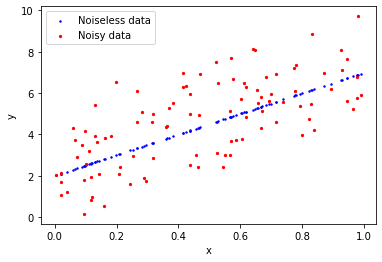

In [127]:
# plot the data
fig = plt.figure()
fig1 = fig.add_subplot(111)

fig1.scatter(x,y_noiseless,s=2,c='b',label='Noiseless data')
fig1.scatter(x,y,s=5,c='r',label='Noisy data')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 4. Data  Model - Compute regression coefficients
A linear regression model can be fit using different techniques, including:
1. Calculus and algebra.
- Gradient descent.

Both techniques aim to minimize a cost function, $J(\beta_{0-n})$, which the model creator must decide. 

- Technique 1 applies calculus and algebra to determine a formula or equation wich solves for the minimum values of the cost function, i.e. $Min\,J(\beta_{0-n})$. 

- Technique 2 uses iterative computational (numerical) technique(s) to approach the minimum value of the cost function.

We will explore technique 1, since not all problems are simple enough to be solved analytically like this.

*Simple linear regression* uses **squared vertical deviations** for the cost function. Deviation is is the difference between a sample's value and its expected value.
> I.e.  The expected value is the estimated mean value of a dependent variable from a set of $n$ samples sampled with the same value for the independent variables.

We compute our expected value for sample $i$ using our regression model equation :
$$\text{Exepected value}\,y_i=\beta_0+\beta_1x_i = h(x_i)$$

This makes our deviation ( $ \varepsilon_i $ ) :
$$\varepsilon_i = h(x_i)-y_i = \beta_0+\beta_1x_i - y_i$$

> Deviation is sometimes also called *residual error* or just *error*, so squared vertical deviation is also called *squared error.*

Therefore, our **squared vertical deviations** are :
$$\varepsilon_i^2 = (h(x_i)-y_i)^2$$

and our cost function is the sum of all the errors in our sample set :

$$J(\beta_0,\beta_1) = \sum_{i=1}^n \varepsilon_i^2 = \sum_{i=1}^n(h(x_i)-y_i)^2$$
> This is called the *Least Squares Technique,* and is the technique used in *Simple Linear Regression*

There are other error function techniques, including *absolute error* and *total least squares*. We won't explore them now. 

To compute our optimal model parameters we use calculus to find the minimum of our cost function. 

**The optimal model parameters are the solution to the set of equations (equated to zero, for the minimum) produced from the partial derivatives of the cost function with respect to each model parameter.**
 $\dfrac{\partial J}{\partial \beta_0} = \sum_{i=1}^n2(\beta_0+\beta_1x_i - y_i) = 0 \tag{1.0}$


 $\dfrac{\partial J}{\partial \beta_1} = \sum_{i=1}^n2(\beta_0+\beta_1x_i - y_i)x_i = 0 \tag{2.0}$

Here are the steps solving the equations:

$$
\begin{align}
\tag{1.1}
\sum_{i=1}^n2(\beta_0+\beta_1x_i - y_i) &&\:&& = 0 
\to && 
\sum_{i=1}^n \beta_0 + \sum_{i=1}^n \beta_1x_i = \sum_{i=1}^n y_i
\to &&
n\beta_0 + \sum_{i=1}^n \beta_1x_i && = &&\sum_{i=1}^n y_i
\\
\tag{2.1}
\sum_{i=1}^n2(\beta_0+\beta_1x_i - y_i) && x_i && = 0
\to && &&
\sum_{i=1}^n \beta_0x_i + \sum_{i=1}^n \beta_1x_i^2 && = &&\sum_{i=1}^n y_ix_i
\end{align}
$$

The equation for the mean (either $\bar x$ or $\bar y$) is :

$$
\bar z = \dfrac{1}{n} \sum_{i=1}^n z_i \quad\therefore\quad \sum_{i=1}^n z_i = n \bar z
$$

So, substituting that in yields:
$$
n\beta_0 + n\beta_1\bar x = n\bar y
\quad\to\quad
\beta_0 = \bar y - \beta_1\bar x \tag{1.2}
$$
and
$$
\beta_0n\bar x + \sum_{i=1}^n \beta_1x_i^2 = \sum_{i=1}^n y_ix_i \quad \text{sub in $\beta_0$}\quad\to\quad
(\bar y - \beta_1\bar x )n\bar x + \sum_{i=1}^n \beta_1x_i^2 = \sum_{i=1}^n y_ix_i \tag{2.2}
$$
And isolating $\beta_1$ yields:
$$
\begin{align}
\tag{2.3}
n\bar y\bar x  - \sum_{i=1}^n y_ix_i  = \beta_1n\bar x^2 - \sum_{i=1}^n \beta_1x_i^2 
\\
\tag{2.4}
\beta_1 = \dfrac{n\bar y\bar x  - \sum_{i=1}^n y_ix_i }{n\bar x^2 - \sum_{i=1}^n x_i^2}
\quad\text{or}\quad \dfrac{\sum_{i=1}^n y_ix_i - n\bar y\bar x }{\sum_{i=1}^n x_i^2-n\bar x^2}
\end{align}
$$
and $\beta_0$ was already found:
$$
\beta_0 = \bar y - \beta_1\bar x 
$$

In [128]:
# Get the number of observervations
n = np.size(x)

# Calculate the mean of the independent and dependent variables
m_x, m_y = np.mean(x), np.mean(y)

# Calculate the summed squared deviation and summed squared co-deviation  
SS_xy = np.sum(y*x) - n*m_y*m_x 
SS_xx = np.sum(x*x) - n*m_x*m_x  #equivalent to np.sum((x-m_x)**2)

# Calculate the regression coefficients 
b_1 = SS_xy / SS_xx 
b_0 = m_y - b_1*m_x

# Display the regression coefficients
print("The estimated regression coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b_0,b_1)) 

The estimated regression coefficients:
b_0 = 2.3332266161708524            
b_1 = 4.905402532103041


## 5. Results and Insights - Compare the model to the data
Visualize the resulting regression model.

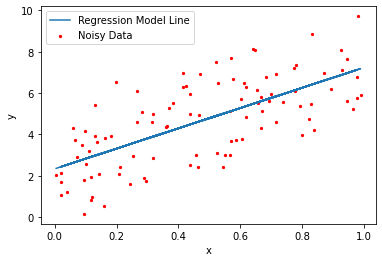

In [129]:
# Plot the data again
plt.scatter(x,y,s=5,c='r', label = "Noisy Data")
  
# Generate the predicted response 
y_pred = b_0 + b_1*x 
  
# Plot the regression line 
plt.plot(x, y_pred, label = "Regression Model Line") 
plt.legend(loc='upper left')

# Add labels 
plt.xlabel('x') 
plt.ylabel('y') 
  
# function to show plot 
plt.show() 

## References
1. https://realpython.com/linear-regression-in-python/
- https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2
- https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
- https://www.geeksforgeeks.org/linear-regression-python-implementation/
- https://www.colorado.edu/amath/sites/default/files/attached-files/ch12_0.pdf
- https://towardsdatascience.com/from-linear-to-logistic-regression-explained-step-by-step-11d7f0a9c29